In [1]:
# Initialize Otter
%pip install otter-grader
import otter
grader = otter.Notebook("HW 1 - Introduction To ML, Linear Regression Refresher.ipynb")

Note: you may need to restart the kernel to use updated packages.


### Grading
The final score that you will receive for your programming assignment is generated in relation to the total points set in your programming assignment item—not the total point value in the autograder output.     
Autograded quesions may have hidden tests and/or public tests. You can see the public test results when you run the notebook with otter grader. Usually public tests are for simple checks (such as variable types) and may not indicate that the answer is correct.     
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** The autograder will not work properly if your change the variable or method signatures. 

#  I. EDA, Simple Linear Regression

In this part, we will use a simplified data and create a simple linear regression model. The dataset can be downloaded from https://www.kaggle.com/harlfoxem/housesalesprediction/download.    
This dataset contains house sale prices for Kings County, which includes Seattle. It includes homes sold between May 2014 and May 2015. There are several versions of the data. Some additional information about the columns is available here: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/, some of which are copied below.

|Variable |	Description|
|:---------|:-------------|
|id 	|Identification|
|date |	Date sold|
|price |	Sale price|
|bedrooms |	Number of bedrooms|
|bathrooms |	Number of bathrooms|
|sqft_liv |	Size of living area in square feet|
|sqft_lot| 	Size of the lot in square feet|
|floors |	Number of floors|
|waterfront |	‘1’ if the property has a waterfront, ‘0’ if not.|
|view |	An index from 0 to 4 of how good the view of the property was|
|condition |	Condition of the house, ranked from 1 to 5|
|grade |	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.|
|sqft_above |	Square feet above ground|
|sqft_basmt |	Square feet below ground|
|yr_built 	|Year built|
|yr_renov |	Year renovated. ‘0’ if never renovated|
|zipcode |	5 digit zip code|
|lat 	|Latitude|
|long 	|Longitude|
|squft_liv15 |	Average size of interior housing living space for the closest 15 houses, in square feet|
|squft_lot15 |	Average size of land lost for the closest 15 houses, in square feet|

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import scipy as sp
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = pd.read_csv('data/house_data_washington.csv.gz', compression = 'gzip')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 1. Munging data [20 pts]
### 1a) Date string to numbers [5 pts]
Inspect the data frame and data type of each column. The column 'date' is the date sold, and has string value. We will extract year and month information from the string. 
In the data frame df, create new features 'sales_year' and 'sales_month', which values are integer.

Hint: Consider using .apply(lambda ...) method.

In [5]:
# extract year and month info from the string
# create new features 'sales_year' and 'sales_month' in df
df['sales_year'] = df['date'].apply(lambda x: int(x[:4]))
df['sales_month'] = df['date'].apply(lambda x: int(x[4:6]))

In [6]:
df['sales_year'].dtype

dtype('int64')

### 1b) Now, let's count how many sales happened each year and each month.
#### 1b-i) Use .groupby and .count methods to calculate how many sales per year, and how many sales per month. 
Display the results by printing the groupby object with one relevant column. 
For example, a result for sales_month may look like    

|     |sales_month|
|:---|:----------|
|1 |     978|     
|2 |    1250  |  
|3 |    1875   |  
...

In [7]:
# Uncomment one of the following lines to check the number of sales in each month or year
# df.groupby('sales_month')['sales_month'].count()
df.groupby('sales_year')['sales_year'].count()

sales_year
2014    14633
2015     6980
Name: sales_year, dtype: int64

#### 1b-ii) Which month has the most number of sales? Answer the month as an integer number.

In [8]:
print(f'Month with most number of sales: {df['sales_month'].max()}')
# uncomment and update the value.
most_sales = df['sales_month'].max()

Month with most number of sales: 12


#### 1b-iii) Which months has the least number of sales?

In [9]:
print(f'Month with least number of sales: {df['sales_month'].min()}')
# uncomment and update the value.
least_sales = df['sales_month'].min()

Month with least number of sales: 1


### 1c) Variable types [5 pts]
Inspect each feature's data type and variable type. What is the best description for the variable type of following features? Update the string to 'numeric' or 'categorical'.

In [10]:
# uncomment the features below and update the strings with 'numeric' or 'categorical'
price = 'numeric'
bathrooms = 'numeric'
waterfront = 'categorical'
grade = 'numeric'
zipcode = 'categorical'

### 1d) Drop features [5 pts]
Let's drop features that are unnecessary. `id` is not a meaningful feature. `date` string has been coded to `sales_month` and `sales_year`, so we can remove `date`. `zipcode` can be also removed as it's hard to include in a linear regressio model and the location info is included in the `lat` and `long`.
Drop the features `id`, `date`, and `zipcode` and replace the df.

Hint: Use .drop() method.

In [11]:
# drop unnecessary features, replace df

df = df.drop(columns=['id', 'date', 'zipcode'])

df.info() #a quick check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  sales_

In [12]:
grader.check("q1d")

q1d results: All test cases passed!

## 2. More EDA; Correlation and pair plot [15 pts]
### 2a) Get correlation matrix on the data frame. [5 pts]
Which feature may be the best predictor of price based on the correlation? Answer as a string value (e.g. best_guess_predictor = 'yr_built')

In [13]:
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=True))
# uncomment and update best_guess_predictor with a string value
best_guess_predictor = 'sqft_living'

sales_month     -0.010081
sales_year       0.003576
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


<!-- BEGIN QUESTION -->

### 2b) Display the correlation matrix as heat map [5 pts]
[`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) can visualize a matrix as a heatmap. Visualize the correlation matrix using seaborn.heatmap(). Play with color map, text font size, decimals, text orientation etc. If you find how to make a pretty visualization, please share in the discussion board. 

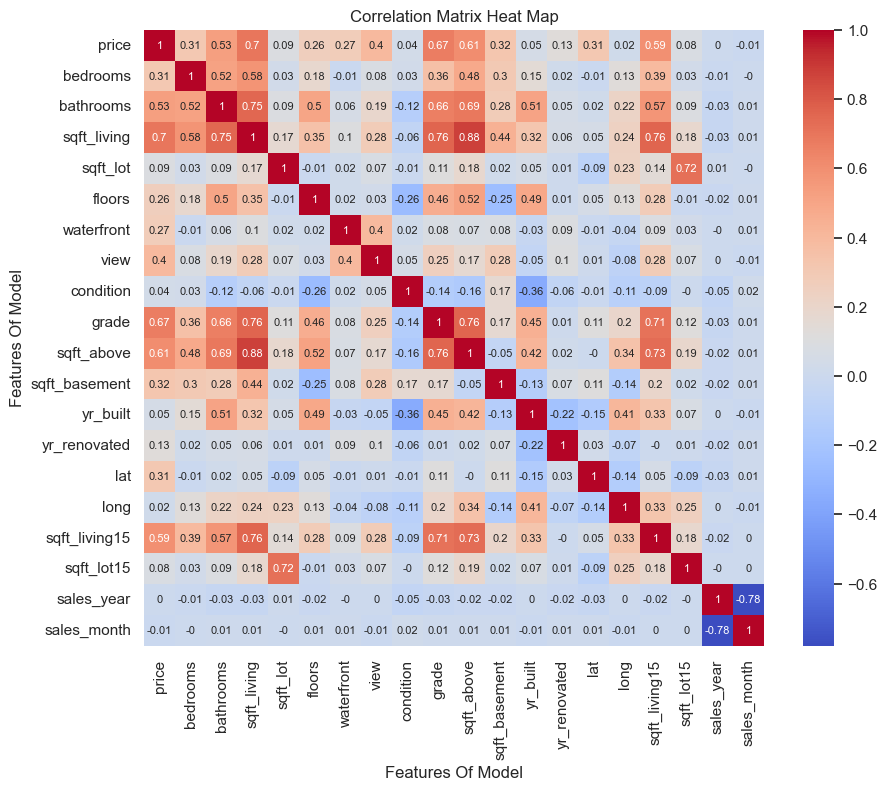

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.xlabel('Features Of Model')
plt.ylabel('Features Of Model')
plt.title('Correlation Matrix Heat Map')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 2c) Pair plot [5 pts]
Pair plot is a fast way to inspect relationships between features. Use seaborn's .pairplot() function to draw a pairplot if the first 10 columns (including price) and inspect their relationships. Set the diagonal elements to be KDE plot.

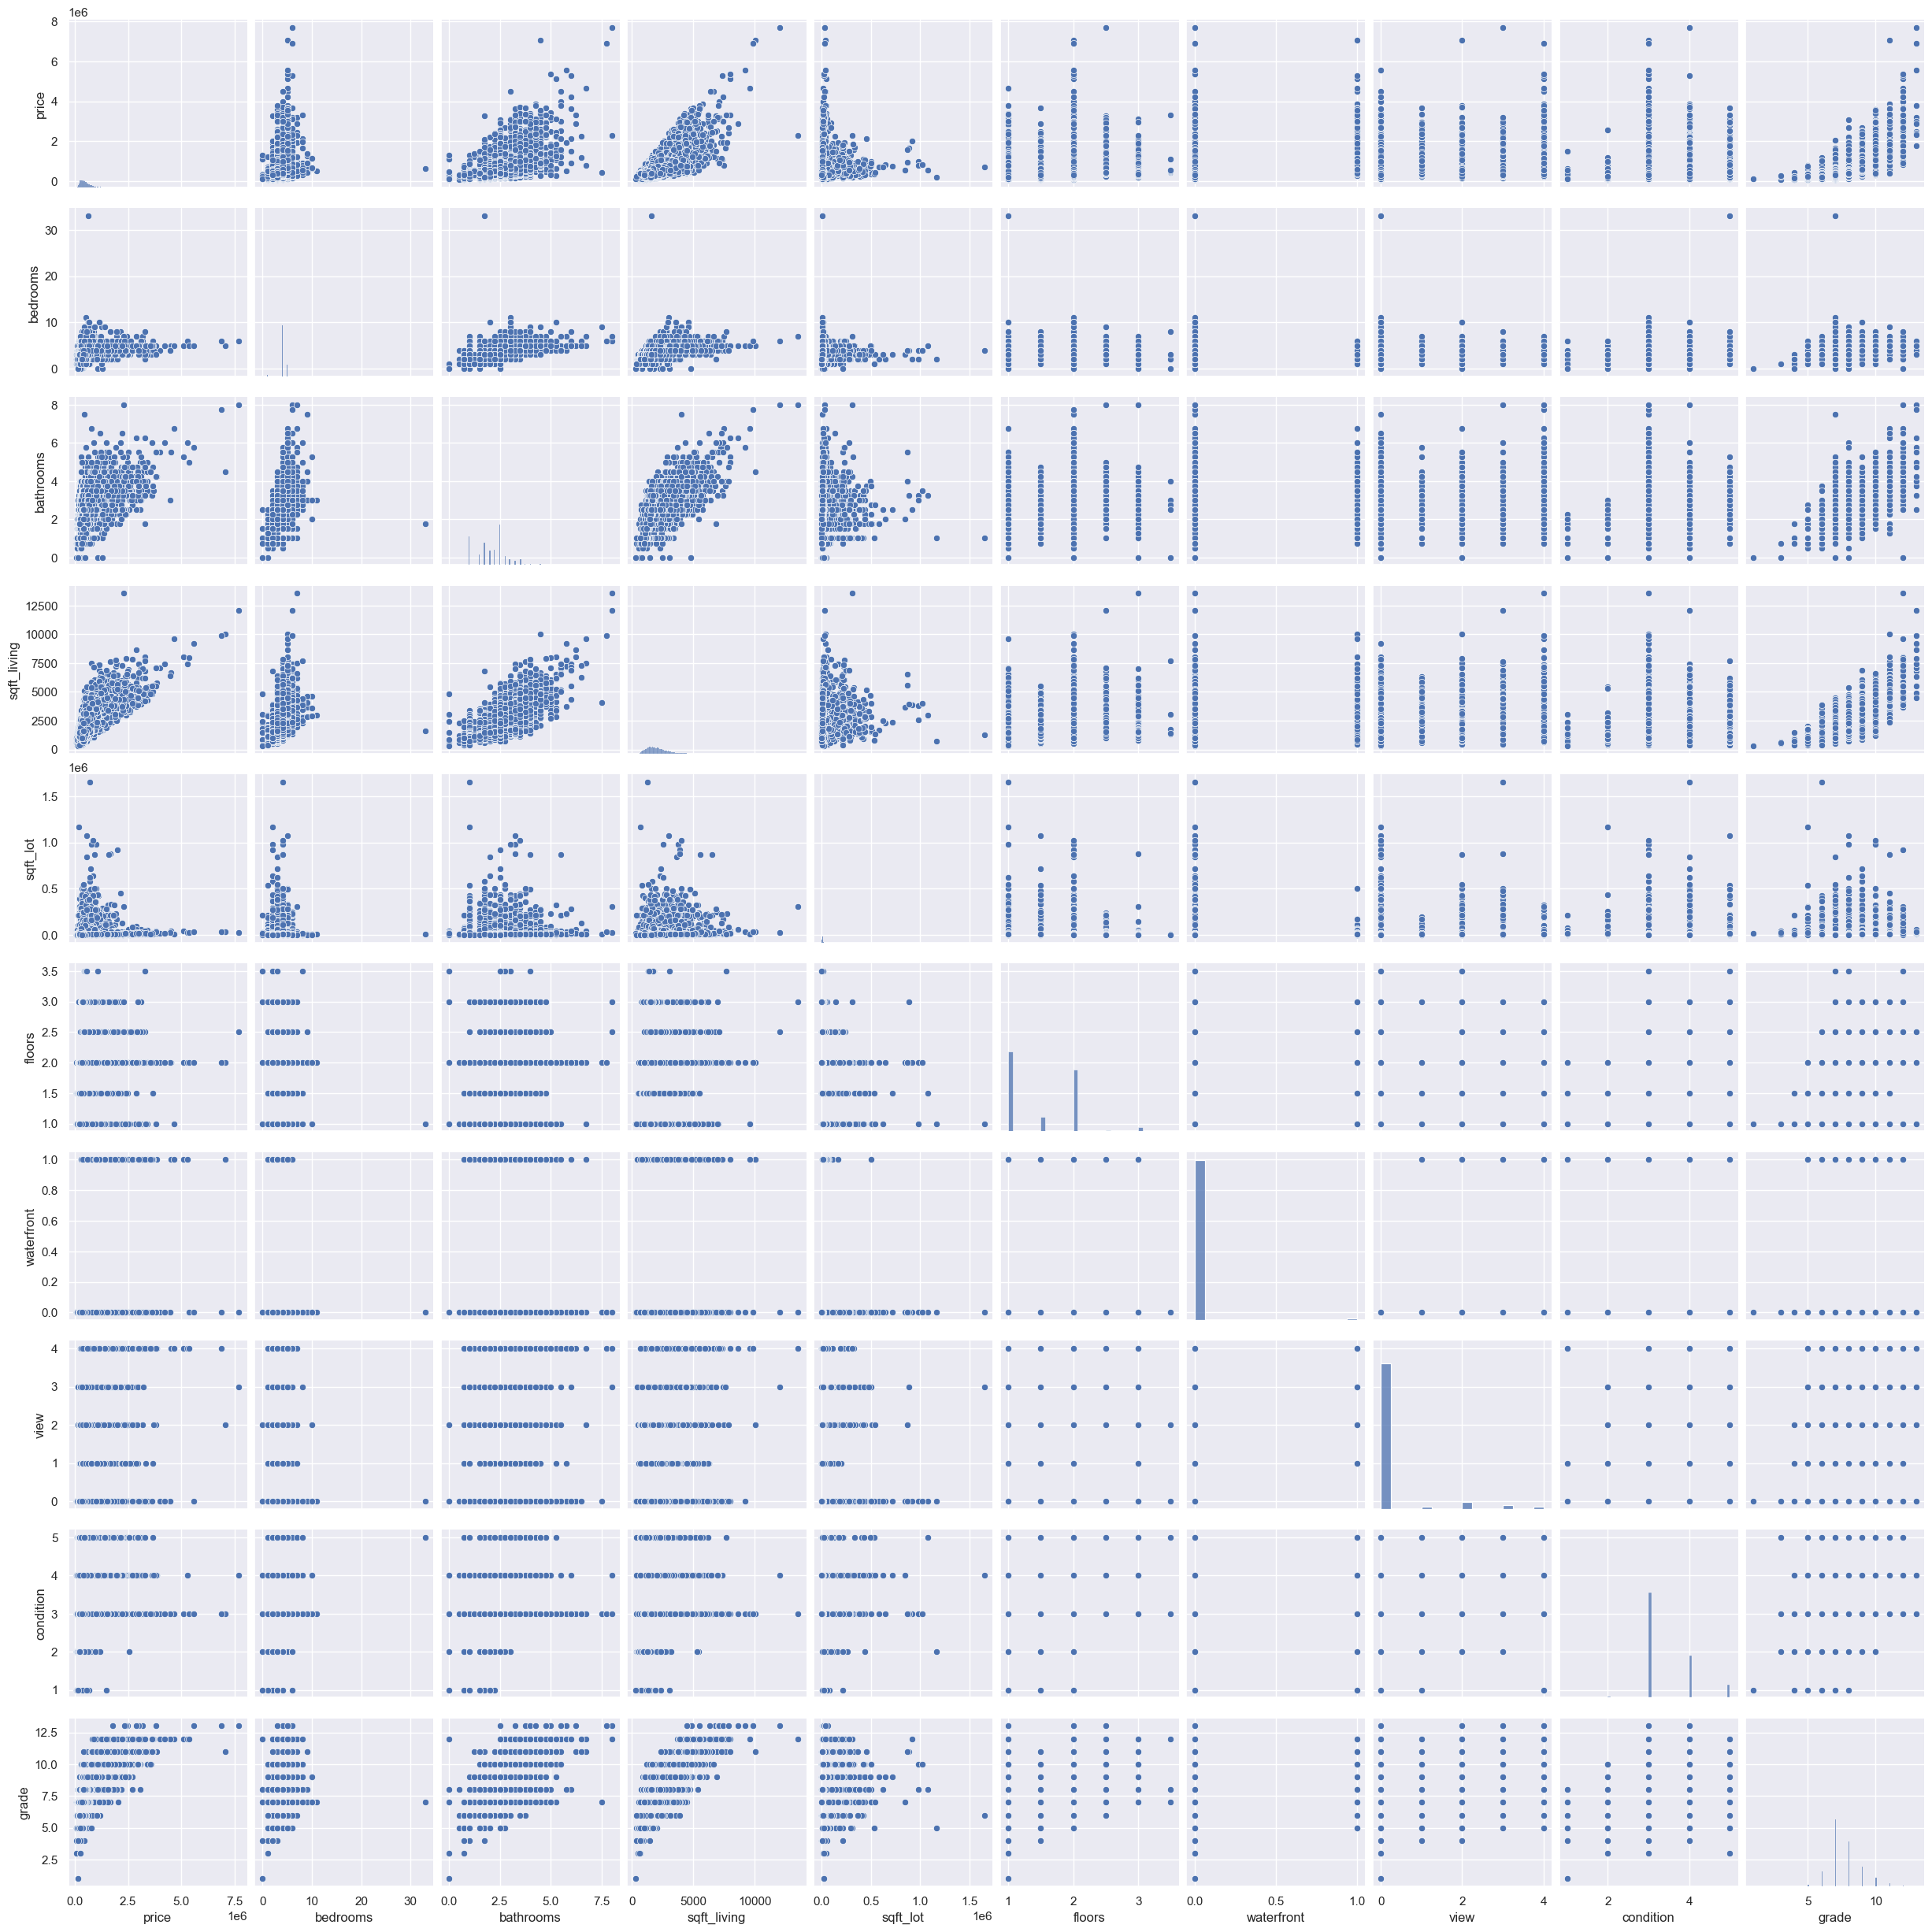

In [15]:
# practice inspecting relationships between features using a pair plot. 
sns.pairplot(df.iloc[:, :10])

<!-- END QUESTION -->

## 3. Simple linear regression [15 pts]

### 3a) Data preparation [5 pts]
We will split the data to train and test datasets such that the test dataset is 20% of original data.
Use `sklearn.model_selection.train_test_split` function to split the data frame to X_train and X_test. X_train is 80% of observation randomly chosen. X_test is the rest 20%. Both X_train and X_test are `pd.DataFrame` object and include 'price' in the table. Note that the train_test_split can handle data frame as well as array.

In [16]:
from sklearn.model_selection import train_test_split
# use sklearn.model_selecttion.train_test_split to split the data frame 
# X_train is 80% of the observations; X_test is 20% of the observations
# print length of X_train and X_test
X_train, X_test = train_test_split(df, test_size=0.2)
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')

Length of X_train: 17290
Length of X_test: 4323


In [17]:
grader.check("q3a")

q3a results: All test cases passed!

<!-- BEGIN QUESTION -->

### 3b) Train a simple linear regression model [5pts]
Use the best_guess_predictor as a single predictor and build a simple linear regression model using `statsmodels.formula.api.ols` function (https://www.statsmodels.org/dev/example_formulas.html)
Print out the result summary. Train on the X_train portion. What is the adjusted R-squared value?

In [18]:
# use best_guess_predictor as a single predictor
# build a simple linear regression model, train on the X_train portion

model = smf.ols(formula=f'price ~ {best_guess_predictor}', data=X_train)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.667e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:04:46   Log-Likelihood:            -2.4017e+05
No. Observations:               17290   AIC:                         4.803e+05
Df Residuals:                   17288   BIC:                         4.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.089e+04   4910.866     -8.326      

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3c) Best predictor [5 pts]
In question 2a, we picked a best guess predictor for price based on the correlation matrix. Now we will consider whether the best_guess_predictor that we used is still the best.<br>
Print out a list ranking all of the predictors. Then print out a list of the top three predictors in order.<br>      
Hint: Linear regression uses adjusted R squared as fit performance. <br>

**Answer the following questions**: 
1. What were your top three predictors? 
2. How did you order your list of predictors to select those as the top ones? 
3. Is your top predictor for this section the same as the best guess predictor you selected in question 2a? 

#### Answer

1. The top three predictors for price were 'sqft_liv', 'grade', and 'sqft_above'.
2. The list of predictors was ordered by the adjusted R-squared value.
3. The top predictor for this section was the same as the best guess predictor selected in question 2a.

In [19]:
model = smf.ols(formula=f'price ~ {best_guess_predictor}', data=X_train)
res = model.fit()
vals = {}
for variable in X_train.columns:
    model = smf.ols(formula=f'price ~ {variable}', data=X_train)
    res = model.fit()
    vals[variable] = float(res.summary().tables[0][1][3].data)

vals.pop('price')

top_three = sorted(vals.items(), key=lambda item: item[1], reverse=True)[:3]

for key, value in top_three:
    print(f"Variable: {key}")
    print(f"Adj. R-Squared: {value}")
    print("\n")

# uncomment and update top_three
top_three = ['sqft_living', 'grade', 'sqft_above']

Variable: sqft_living
Adj. R-Squared: 0.491


Variable: grade
Adj. R-Squared: 0.444


Variable: sqft_above
Adj. R-Squared: 0.363




<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# II. Polynomial and Multilinear Regression
In this part, we will improve our model using multiple features and higher powers of features.

## 4. Polynomial Regression [20 pts]
Using the best predictor found from 3c, let's add higher orders of the feature.    
We will iteratively add higher order terms and plot train and test errors (MSE).    
### 4a) Iteratively add higher order terms up to 5th power of the best predictor [5 pts]
For example, compare models
- $model1 = a_0 + a_1 X$
- $model2 = a_0 + a_1 X + a_2 X^2$
- $model3 = a_0 + a_1 X + a_2 X^2 + a_3 X^3$   
...    
Hint: Use for loop and use 'np.power()' in the formula of smf.ols method. e.g. formula = 'y~X+np.power(X,2)'.     
Hint: Before you build models, should we rescale the X first? Why or why not? How would you rescale? How about rescaling y? Choose rescaling method that's more interpretable. For example, you can think about changing the unit of $X$ to sqft to 1000 sqft.

### 4b) Visualize the model fit results [5 pts]
Now we will add tools helpful for judging whether each model looks good.    
Modify your for loop code from above and display a graph that shows train data ($X_\textrm{tr}$, $y_\textrm{tr}$) and train prediction result ($X_\textrm{tr}$, model($X_\textrm{tr}$)), and the model summary.
As an example, the univariate linear model's train result looks like below (blue dots are the train data, and red dotted line is the prediction from the train data, the complexity $k=1$ is the heighest power of $X$ in the model).  
![An examlpe plot for univariate linear model](linreg_result.png)

### 4c) Compare train error and test error [5 pts]
We will inspect train error and test error for each model complexity. To do that, let's save the train and test errors after we build each model. Modify your for loop above to save train error and test error from each model. Plot the final result showing train and test errors. You graph will have the complexity $k$ as x-axis and the train and test errors on the y-axis. Also, make legends for train and test errors.  

Hint: You may use functions in sklearn.metrics to calculate errors.     
Hint: train error refers the error between y_train and model prediction from X_train whereas test error refers the error between y_test and model prediction from X_test.    
Hint: RMSE can be useful to inerpret the error of y than MSE. Or mean absolute percentage error can be useful metric.

Model with power 1 summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.667e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:04:46   Log-Likelihood:            -2.4017e+05
No. Observations:               17290   AIC:                         4.803e+05
Df Residuals:                   17288   BIC:                         4.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

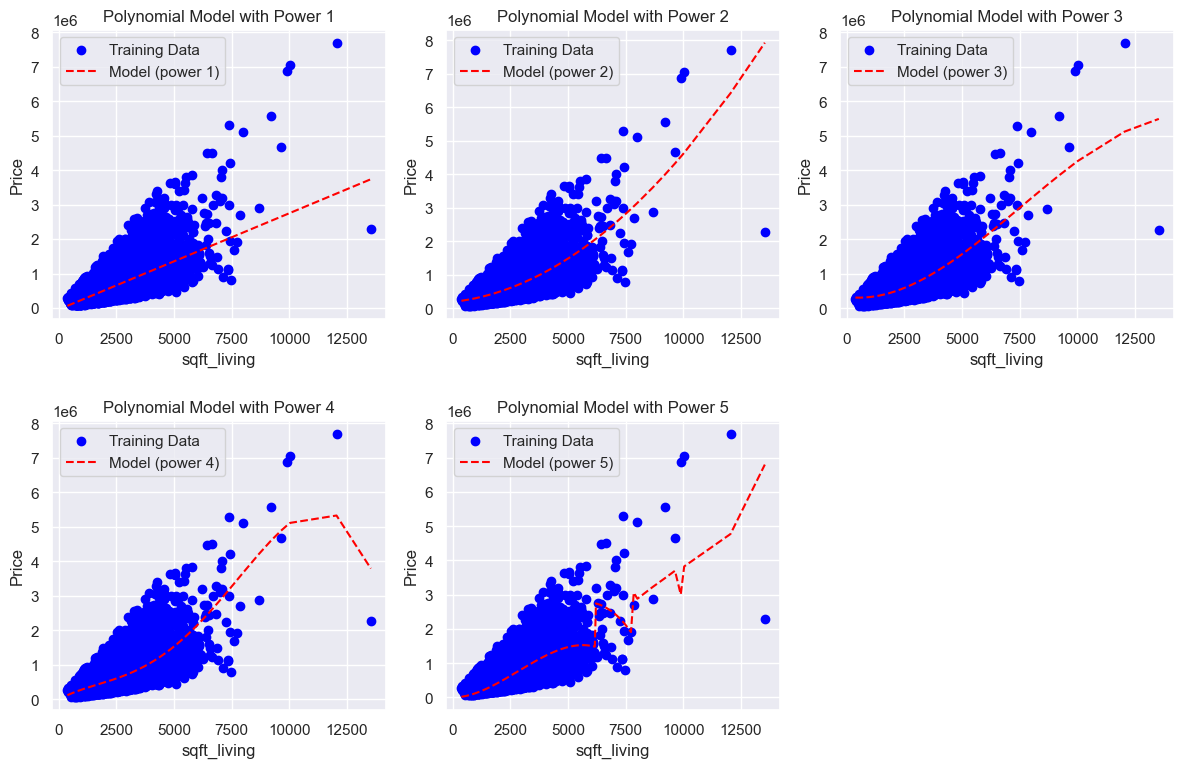

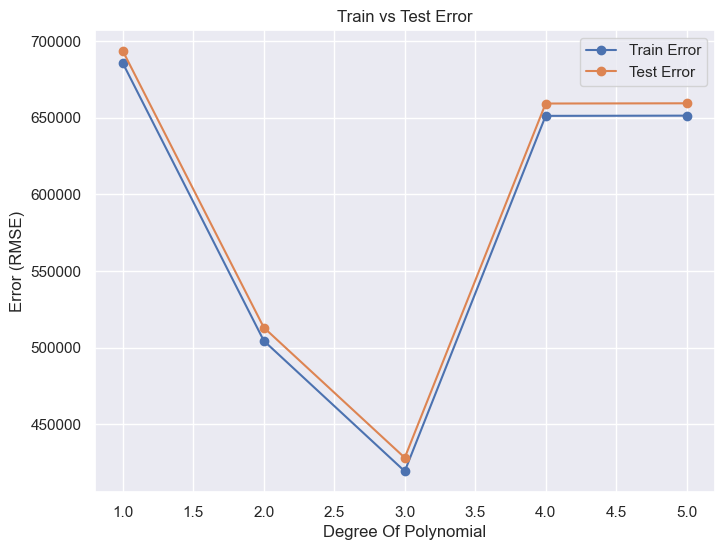

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

models = []
max_power = 5

for i in range(1, max_power + 1):
    formula = 'price ~ ' + ' + '.join([f'np.power({best_guess_predictor}, {j})' for j in range(1, i + 1)])
    model = smf.ols(formula=formula, data=X_train).fit()
    models.append(model)
    print(f'Model with power {i} summary:')
    print(model.summary())

X_train_sorted = X_train.sort_values(by=best_guess_predictor)
X_values = X_train_sorted[best_guess_predictor]

plt.figure(figsize=(12, 8))

for i, model in enumerate(models):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_values, X_train_sorted['price'], color='blue', label='Training Data')
    plt.plot(X_values, model.predict(X_train_sorted), color='red', linestyle='--', label=f'Model (power {i + 1})')
    plt.title(f'Polynomial Model with Power {i + 1}')
    plt.xlabel(best_guess_predictor)
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[best_guess_predictor] = scaler.fit_transform(X_train[[best_guess_predictor]])

X_test_scaled = X_test.copy()
X_test_scaled[best_guess_predictor] = scaler.transform(X_test[[best_guess_predictor]])

train_errors = []
test_errors = []

for model in models:
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    train_rmse = np.sqrt(mean_squared_error(X_train_scaled['price'], train_pred))
    test_rmse = np.sqrt(mean_squared_error(X_test_scaled['price'], test_pred))
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train Error', marker='o')
plt.plot(range(1, len(test_errors) + 1), test_errors, label='Test Error', marker='o')
plt.xlabel('Degree Of Polynomial')
plt.ylabel('Error (RMSE)')
plt.legend()
plt.title('Train vs Test Error')
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 4d) Inspect the results from 4b) and 4c), describe your observation. Based on the observation, pick a final model. Justify your decision. [5 pts]
Hint: Refer to Elobow plot and Occam's razor principle.    
Hint: If the trent at k=10 is not enough, try changing the power limit (previously set to $k_\textrm{max}=10$) to smaller and bigger numbers and see the general trend.    
Hint: You can also consider AIC and BIC.

Based on the results that I see from both parts 4b and 4c I am going to choose model 3 (the third degree polynomial model). The reason why I picked this model is primarily because the RMSE of the model is very low and the difference between the training and testing of the model is also very small. This indicates that the model is not overfitting the data and is generalizing well.

Beyond using three features, one may start to overfit the data. And although the model may have good statistical numbers, it may be volatile to other data sets and not generalize well. This is why I chose the third degree polynomial model.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5. Multilinear Regression [20 pts]
Let's include more features (linear) to our model instead of having single factor and its higher order terms. For the complexity sake, we will not consider higher orders of features.

### 5a) Implement hybrid approach of forward and backward selection methods. [15 pts]
Without using rescaling for y (price) and all features, implement the hybrid approach.
What is the number of features in the final model (not inclusing intercept as feature)?

Hint: Following logic might help.
```
while
    for feature in [features that are not in the model already]
        best_feature <- select a feature that gives the heighest adjusted R2
        best_model <- add the best_feature in the model

       for attribute in the all attributes of the best_model
           inspect p-value of each attribute
           remove any attribute(s) with high p-values from the best_model
    break and return the best_model if the best_model (the set of its attributes) no longer changes.  
```      

In [21]:
from sklearn.metrics import root_mean_squared_error

features = list(X_train.columns)
selected_features = []
train_rmse_list = []
test_rmse_list = []
num_features_list = []

while True:
    best_feature = None
    best_model = None
    best_adj_r2 = -float('inf')
    initial_features = selected_features.copy()
    for feature in features:
        if feature not in selected_features and feature != 'price':
            model = sm.OLS(X_train['price'], sm.add_constant(X_train[selected_features + [feature]])).fit()
            adj_r2 = model.rsquared_adj
            if adj_r2 > best_adj_r2:
                best_feature = feature
                best_model = model
                best_adj_r2 = adj_r2
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Added feature: {best_feature} with adjusted R²: {best_adj_r2}")
    p_values = best_model.pvalues.drop('const')
    removed_feature = None
    for feature in selected_features.copy():
        if p_values[feature] > 0.05:
            selected_features.remove(feature)
            removed_feature = feature
            print(f"Removed feature: {feature} due to high p-value")
    
    if selected_features == initial_features:
        break
    train_predictions = best_model.predict(sm.add_constant(X_train[selected_features]))
    train_rmse = root_mean_squared_error(X_train['price'], train_predictions)
    train_rmse_list.append(train_rmse)
    test_predictions = best_model.predict(sm.add_constant(X_test[selected_features]))
    test_rmse = root_mean_squared_error(X_test['price'], test_predictions)
    test_rmse_list.append(test_rmse)
    num_features_list.append(len(selected_features))

final_model = sm.OLS(X_train['price'], sm.add_constant(X_train[selected_features])).fit()
print(final_model.summary())

Added feature: sqft_living with adjusted R²: 0.490904370154566
Added feature: lat with adjusted R²: 0.565300614252068
Added feature: view with adjusted R²: 0.6091695996883466
Added feature: grade with adjusted R²: 0.6353021732996136
Added feature: yr_built with adjusted R²: 0.6665143519805873
Added feature: waterfront with adjusted R²: 0.6826980072165417
Added feature: bedrooms with adjusted R²: 0.6864051055105373
Added feature: bathrooms with adjusted R²: 0.690218953484619
Added feature: condition with adjusted R²: 0.6919529385762787
Added feature: sales_year with adjusted R²: 0.6930887721736385
Added feature: sqft_basement with adjusted R²: 0.6939320791595271
Added feature: long with adjusted R²: 0.6949685311276181
Added feature: sqft_living15 with adjusted R²: 0.6956210680312671
Added feature: yr_renovated with adjusted R²: 0.6961206412940846
Added feature: sqft_lot15 with adjusted R²: 0.6964127144139942
Added feature: sqft_lot with adjusted R²: 0.6965606606036181
Added feature: sal

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5b) Record train and test error for each model complexity [5 pts]
Modify codes in 5a) to record mean squared errors for train and test date.    
Plot the elbow plot and determine the best model comlexity based on mean squared errors.  

Train RMSE: 201269.67253784725
Test RMSE: 205665.59249032827


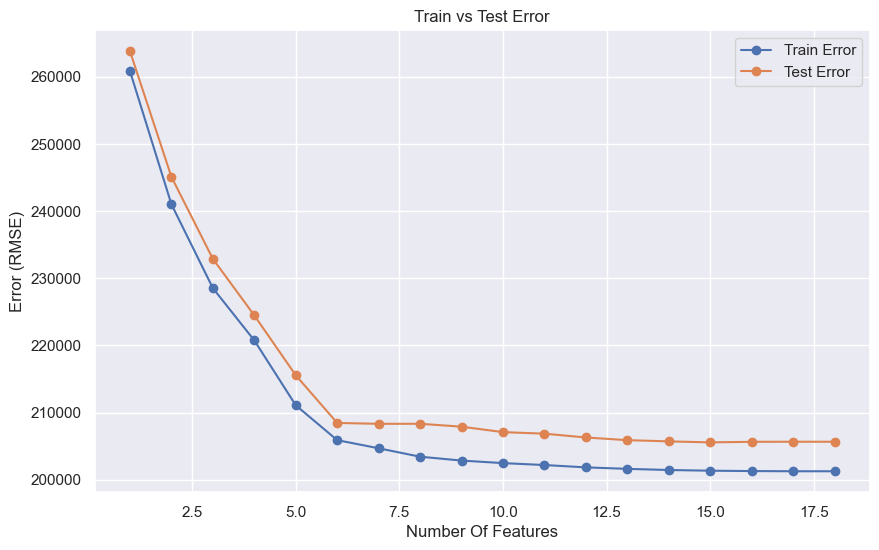

In [22]:
# RMSE for train data
train_predictions = final_model.predict(sm.add_constant(X_train[selected_features]))
train_rmse = root_mean_squared_error(X_train['price'], train_predictions)
print(f"Train RMSE: {train_rmse}")

# RMSE for test data
test_predictions = final_model.predict(sm.add_constant(X_test[selected_features]))
test_rmse = root_mean_squared_error(X_test['price'], test_predictions)
print(f"Test RMSE: {test_rmse}")

plt.figure(figsize=(10, 6))
plt.plot(num_features_list, train_rmse_list, label='Train Error', marker='o')
plt.plot(num_features_list, test_rmse_list, label='Test Error', marker='o')
plt.xlabel('Number Of Features')
plt.ylabel('Error (RMSE)')
plt.legend()
plt.title('Train vs Test Error')
plt.show()

<!-- END QUESTION -->

## 6. Variance Inflation Factor [10 pts]
VIF is a good tool to monitor if there is a multicollinearity among multiple features while correlation matrix only shows two-feature correlations. 

\begin{equation*}
\textrm{VIF}(\hat{\beta}_i) = \frac{1}{1-R^2_{X_i|X_{-i}}},
\end{equation*}

where $R^2_{X_i|X_{-i}}$ is $R^2$ when $X_i$ is fitted using the rest of features.
`statsmodels` library has a module `variance_inflation_factor` that can calculate VIF.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# VIF with all features
features = list(df.drop(['price'],axis=1).columns)
y, X = dmatrices('price ~' + '+'.join(features), df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #note that the variance_inflation_factor uses sm.OLS which requires design matrix unlike smf
vif["feature"] = X.columns
vif

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,feature
0,4.950098e+07,Intercept
1,1.648428e+00,bedrooms
2,3.350062e+00,bathrooms
3,inf,sqft_living
4,2.102639e+00,sqft_lot
5,1.994948e+00,floors
6,1.203619e+00,waterfront
7,1.423652e+00,view
8,1.238183e+00,condition
9,3.413856e+00,grade


<!-- BEGIN QUESTION -->

### 6a) Interpret the above result. [3 pts]
Discuss your observation and how to interpret this result. Can you remove features with abnormal values of VIF? Why or why not?

You can notice immediately from the formula that is presented to us that two things are apparent. 

1. If the $R^{2}$ is very close to 1, the VIF explodes to infinity.
2. IF the $R^{2}$ is very close to 0, the VIF approaches 1.

From this, we should probably remove features with abnormal values of VIF. If the VIF is very high, it means that the feature is highly correlated with other features in the model. This can lead to multicollinearity which can cause the model to be unstable and the coefficients to be unreliable. An argument to keep them is if the features are important and removing them would cause the model to lose predictive power. The features that are the most abnormal are the ones with infinite VIF. In this case, we should probably just get rid of them in our model.

<!-- END QUESTION -->

### 6b) Calculate VIF values of features that were selected from the hybrid approach in 5a). [3 pts]
How do VIF values change? Are all highly correlted features gone?

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, selected_features):
    if len(selected_features) == 0:
        print("No selected features to calculate VIF.")
        return pd.DataFrame(columns=['Feature', 'VIF'])
    
    X_selected = X[selected_features]
    
    if X_selected.shape[1] > 1 and np.linalg.matrix_rank(X_selected) < X_selected.shape[1]:
        print("Selected features result in a singular matrix. Skipping VIF calculation.")
        return pd.DataFrame(columns=['Feature', 'VIF'])
    
    vif_data = pd.DataFrame()
    vif_data['Feature'] = selected_features
    
    try:
        vif_data['VIF'] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
    except ValueError as e:
        print(f"VIF calculation error: {e}")
        return pd.DataFrame(columns=['Feature', 'VIF'])
    
    return vif_data

def filter_constant_features(X, selected_features):
    return [f for f in selected_features if X[f].std() > 1e-8]

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

features = list(X_train.columns)
features.remove('price')
r2_list = []
selected_features = []
train_rmse_list = []
test_rmse_list = []
test_vif_list = []
num_features_list = []
vif_threshold = 5
max_iterations = 100
iterations = 0

while True:
    best_feature = None
    best_model = None
    best_adj_r2 = -float('inf')
    initial_features = selected_features.copy()
    
    for feature in features:
        if feature not in selected_features:
            current_features = selected_features + [feature]
            try:
                model = sm.OLS(X_train['price'], sm.add_constant(X_train[current_features])).fit()
                adj_r2 = model.rsquared_adj
                
                if adj_r2 > best_adj_r2:
                    best_feature = feature
                    best_model = model
                    best_adj_r2 = adj_r2
            except Exception as e:
                print(f"Error fitting model with feature {feature}: {e}")
                continue
    
    if best_feature and best_feature not in selected_features:
        selected_features.append(best_feature)
        vif_data = calculate_vif(X_train, selected_features)
        
        if vif_data['VIF'].max() > vif_threshold:
            selected_features.remove(best_feature)
            print(f"Removed {best_feature} due to high VIF.")
        else:
            train_predictions = best_model.predict(sm.add_constant(X_train[selected_features]))
            train_rmse = root_mean_squared_error(X_train['price'], train_predictions)
            train_rmse_list.append(train_rmse)
            
            test_predictions = best_model.predict(sm.add_constant(X_test[selected_features]))
            test_rmse = root_mean_squared_error(X_test['price'], test_predictions)
            test_rmse_list.append(test_rmse)
            
            num_features_list.append(len(selected_features))
    else:
        print("No additional features to add; stopping the loop.")
        break
    
    iterations += 1
    if iterations >= max_iterations or initial_features == selected_features:
        print("Maximum iterations reached or no change in selected features; stopping the loop.")
        break

if len(selected_features) > 0:
    final_model = sm.OLS(X_train['price'], sm.add_constant(X_train[selected_features])).fit()
    print(final_model.summary())
    
    final_vif_data = calculate_vif(X_train, selected_features)
    print(final_vif_data)
else:
    print("No features left to build the final model.")

VIF calculation error: zero-size array to reduction operation maximum which has no identity
Removed lat due to high VIF.
Maximum iterations reached or no change in selected features; stopping the loop.
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.667e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:04:48   Log-Likelihood:            -2.4017e+05
No. Observations:               17290   AIC:                         4.803e+05
Df Residuals:                   17288   BIC:                         4.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
        

<!-- BEGIN QUESTION -->

### 6c) Eliminate features in order of feaure importance found in the hybrid approach and calculate VIFs. [4 pts]
Discuss general observation in relation with model complexity.     
Find the maximum number of features (excluding intercept) that gives all VIF values (except for intercept) smaller than 5.
VIF = 5 is a rule of thumb threshold often used in practice. If VIF is smaller than 5, we can consider the model doesn't have features that are very highly correlated.     

With a threshold for the VIF of 5, most of the features are still present in the model. This is because the VIF values are not very high and the features are not highly correlated with each other. This is a good sign because it means that the model is not overfitting the data and is generalizing well.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, selected_features):
    if len(selected_features) == 0:
        print("No selected features to calculate VIF.")
        return pd.DataFrame(columns=['Feature', 'VIF'])
    
    X_selected = X[selected_features]
    
    if X_selected.shape[1] > 1 and np.linalg.matrix_rank(X_selected) < X_selected.shape[1]:
        print("Selected features result in a singular matrix. Skipping VIF calculation.")
        return pd.DataFrame(columns=['Feature', 'VIF'])
    
    vif_data = pd.DataFrame()
    vif_data['Feature'] = selected_features
    
    try:
        vif_data['VIF'] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
    except ValueError as e:
        print(f"VIF calculation error: {e}")
        return pd.DataFrame(columns=['Feature', 'VIF'])
    
    return vif_data

def filter_constant_features(X, selected_features):
    return [f for f in selected_features if X[f].std() > 1e-8]

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

features = list(X_train.columns)
features.remove('price')
r2_list = []
selected_features = []
train_rmse_list = []
test_rmse_list = []
test_vif_list = []
num_features_list = []
vif_threshold = 5
max_iterations = 100
iterations = 0

while True:
    best_feature = None
    best_model = None
    best_adj_r2 = -float('inf')
    initial_features = selected_features.copy()
    
    for feature in features:
        if feature not in selected_features:
            current_features = selected_features + [feature]
            try:
                model = sm.OLS(X_train['price'], sm.add_constant(X_train[current_features])).fit()
                adj_r2 = model.rsquared_adj
                
                if adj_r2 > best_adj_r2:
                    best_feature = feature
                    best_model = model
                    best_adj_r2 = adj_r2
            except Exception as e:
                print(f"Error fitting model with feature {feature}: {e}")
                continue
    
    if best_feature and best_feature not in selected_features:
        selected_features.append(best_feature)
        vif_data = calculate_vif(X_train, selected_features)
        
        if vif_data['VIF'].max() > vif_threshold:
            selected_features.remove(best_feature)
            print(f"Removed {best_feature} due to high VIF.")
        else:
            train_predictions = best_model.predict(sm.add_constant(X_train[selected_features]))
            train_rmse = root_mean_squared_error(X_train['price'], train_predictions)
            train_rmse_list.append(train_rmse)
            
            test_predictions = best_model.predict(sm.add_constant(X_test[selected_features]))
            test_rmse = root_mean_squared_error(X_test['price'], test_predictions)
            test_rmse_list.append(test_rmse)
            
            num_features_list.append(len(selected_features))
    else:
        print("No additional features to add; stopping the loop.")
        break
    
    iterations += 1
    if iterations >= max_iterations or initial_features == selected_features:
        print("Maximum iterations reached or no change in selected features; stopping the loop.")
        break

if len(selected_features) > 0:
    final_model = sm.OLS(X_train['price'], sm.add_constant(X_train[selected_features])).fit()
    print(final_model.summary())
    
    final_vif_data = calculate_vif(X_train, selected_features)
    print(final_vif_data)
else:
    print("No features left to build the final model.")

VIF calculation error: zero-size array to reduction operation maximum which has no identity
Removed lat due to high VIF.
Maximum iterations reached or no change in selected features; stopping the loop.
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.667e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:04:48   Log-Likelihood:            -2.4017e+05
No. Observations:               17290   AIC:                         4.803e+05
Df Residuals:                   17288   BIC:                         4.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
        

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [28]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/otter/check/notebook.py:470: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")


ExportFailedException: There was an error generating your LaTeX; showing full error message:
    Failed to run "['xelatex', 'notebook.tex', '-quiet']" command:
    This is XeTeX, Version 3.141592653-2.6-0.999995 (TeX Live 2023) (preloaded format=xelatex)
     restricted \write18 enabled.
    entering extended mode
    (./notebook.tex
    LaTeX2e <2022-11-01> patch level 1
    L3 programming layer <2023-02-22>
    (/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
    Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
    (/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/graphicx.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/graphics.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/trig.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/graphics-def/xetex.def)))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/caption/caption.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/caption/caption3.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/float/float.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/xcolor/xcolor.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/graphics-cfg/color.cfg)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/mathcolor.ltx))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/tools/enumerate.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
    (/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
    (/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsmath.sty
    For additional information on amsmath, use the `?' option.
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amstext.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsgen.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsbsy.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsopn.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsfonts/amssymb.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/upquote/upquote.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/eurosym/eurosym.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/fontspec/fontspec.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/l3kernel/expl3.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-xetex.def)))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/fontspec/fontspec-xetex.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/base/fontenc.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/fontspec/fontspec.cfg)))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/unicode-math/unicode-math.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/unicode-math/unicode-math-xetex.s
    ty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/l3packages/l3keys2e/l3keys2e.sty)
     (/usr/local/texlive/2023/texmf-dist/tex/latex/base/fix-cm.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/base/ts1enc.def))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/unicode-math/unicode-math-table.t
    ex))) (/usr/local/texlive/2023/texmf-dist/tex/latex/fancyvrb/fancyvrb.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/grffile/grffile.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/adjustbox/adjustbox.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/xkeyval/xkeyval.sty
    (/usr/local/texlive/2023/texmf-dist/tex/generic/xkeyval/xkeyval.tex
    (/usr/local/texlive/2023/texmf-dist/tex/generic/xkeyval/xkvutils.tex)))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/adjustbox/adjcalc.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/adjustbox/trimclip.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/collectbox/collectbox.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/adjustbox/tc-xetex.def))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/ifoddpage/ifoddpage.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/varwidth/varwidth.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/hyperref/hyperref.sty
    (/usr/local/texlive/2023/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/pdftexcmds/pdftexcmds.sty
    (/usr/local/texlive/2023/texmf-dist/tex/generic/infwarerr/infwarerr.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/kvsetkeys/kvsetkeys.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/kvdefinekeys/kvdefinekeys.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/pdfescape/pdfescape.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/hycolor/hycolor.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/letltxmacro/letltxmacro.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/auxhook/auxhook.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/hyperref/nameref.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/refcount/refcount.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/gettitlestring/gettitlestring.s
    ty (/usr/local/texlive/2023/texmf-dist/tex/latex/kvoptions/kvoptions.sty)))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/hyperref/pd1enc.def)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/intcalc/intcalc.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/etexcmds/etexcmds.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/hyperref/puenc.def)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/url/url.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/bitset/bitset.sty
    (/usr/local/texlive/2023/texmf-dist/tex/generic/bigintcalc/bigintcalc.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/base/atbegshi-ltx.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/hyperref/hxetex.def
    (/usr/local/texlive/2023/texmf-dist/tex/generic/stringenc/stringenc.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/rerunfilecheck/rerunfilecheck.sty
    (/usr/local/texlive/2023/texmf-dist/tex/latex/base/atveryend-ltx.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/uniquecounter/uniquecounter.sty
    ))) (/usr/local/texlive/2023/texmf-dist/tex/latex/titling/titling.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/tools/longtable.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/booktabs/booktabs.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/tools/array.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/tools/calc.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/enumitem/enumitem.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/ulem/ulem.sty)
    (/usr/local/texlive/2023/texmf-dist/tex/generic/soul/soul.sty
    (/usr/local/texlive/2023/texmf-dist/tex/generic/soul/soul-ori.sty))
    (/usr/local/texlive/2023/texmf-dist/tex/latex/jknapltx/mathrsfs.sty)
    No file notebook.aux.
    (/usr/local/texlive/2023/texmf-dist/tex/latex/caption/ltcaption.sty)
    *geometry* driver: auto-detecting
    *geometry* detected driver: xetex

    Package geometry Warning: The marginal notes overrun the paper.
         Add 3.73001pt and more to the right margin.

    *geometry* verbose mode - [ preamble ] result:
    * driver: xetex
    * paper: <default>
    * layout: <same size as paper>
    * layoutoffset:(h,v)=(0.0pt,0.0pt)
    * modes: 
    * h-part:(L,W,R)=(72.26999pt, 469.75502pt, 72.26999pt)
    * v-part:(T,H,B)=(72.26999pt, 650.43001pt, 72.26999pt)
    * \paperwidth=614.295pt
    * \paperheight=794.96999pt
    * \textwidth=469.75502pt
    * \textheight=650.43001pt
    * \oddsidemargin=0.0pt
    * \evensidemargin=0.0pt
    * \topmargin=-37.0pt
    * \headheight=12.0pt
    * \headsep=25.0pt
    * \topskip=10.0pt
    * \footskip=30.0pt
    * \marginparwidth=65.0pt
    * \marginparsep=11.0pt
    * \columnsep=10.0pt
    * \skip\footins=9.0pt plus 4.0pt minus 2.0pt
    * \hoffset=0.0pt
    * \voffset=0.0pt
    * \mag=1000
    * \@twocolumnfalse
    * \@twosidefalse
    * \@mparswitchfalse
    * \@reversemarginfalse
    * (1in=72.27pt=25.4mm, 1cm=28.453pt)


    Package hyperref Warning: Rerun to get /PageLabels entry.


    Underfull \hbox (badness 10000) in paragraph at lines 347--348

    [1] [2]
    Underfull \hbox (badness 10000) in paragraph at lines 369--370

    [3] [4] [5] [6] [7] [8]
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsfonts/umsa.fd)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/amsfonts/umsb.fd)
    (/usr/local/texlive/2023/texmf-dist/tex/latex/jknapltx/ursfs.fd)
    Underfull \hbox (badness 1917) in paragraph at lines 502--517
    \TU/lmr/m/n/10 Hint: Use for loop and use ‘np.power()’ in the formula of smf.ol
    s method. e.g. formula =
    ! Undefined control sequence.
    <recently read> \pandocbounded 
                               
    l.530 \pandocbounded
                        {\includegraphics[keepaspectratio]{linreg_result.png}}
    ? 
    ! Emergency stop.
    <recently read> \pandocbounded 
                               
    l.530 \pandocbounded
                        {\includegraphics[keepaspectratio]{linreg_result.png}}
    Output written on notebook.pdf (8 pages).
    Transcript written on notebook.log.
